## Load Data

In [ ]:
# example of loading the cifar10 dataset
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.datasets import cifar10

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [ ]:
label_dict = {0: "airplane",
              1: "automobile",
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck",}

## Define Research Question

In [ ]:

from sklearn.model_selection import train_test_split
# train and validate
train_proportion = .90
training_X, validation_X, training_y, validation_y = train_test_split(trainX, trainy, train_size=train_proportion)
print(training_X.shape, training_y.shape)
print(validation_X.shape, validation_y.shape)

(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)


In [ ]:
print(f"Minimum pixel value: {training_X.min()}\nMaximum pixel value: {training_X.max()}")

Minimum pixel value: 0
Maximum pixel value: 255


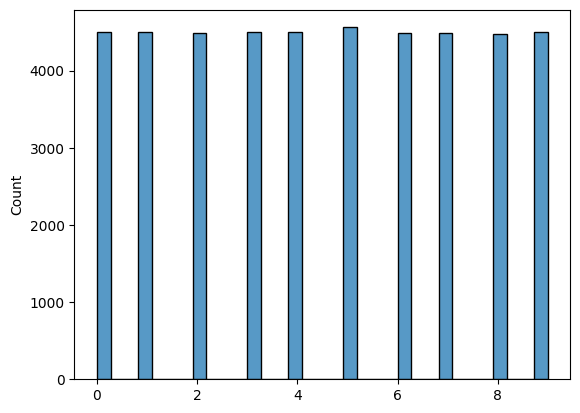

In [ ]:
sns.histplot(training_y.ravel());

In [ ]:
def plot_images_and_hist():
  fig, axs = plt.subplots(4, 4, figsize=(10,10))
  fig.tight_layout()
  image_indices = np.random.randint(0, training_X.shape[0], size=8)
  axes_index = 0
  axs = axs.ravel()
  for image_index in range(0, 8):
    image = training_X[image_indices[image_index]]
    axs[axes_index].imshow(image, interpolation="none")
    axs[axes_index+1].hist(image[:, :, 0].ravel(), histtype='step', color='red');
    axs[axes_index+1].hist(image[:, :, 1].ravel(), histtype='step', color='green');
    axs[axes_index+1].hist(image[:, :, 2].ravel(), histtype='step', color='blue');

    axes_index += 2


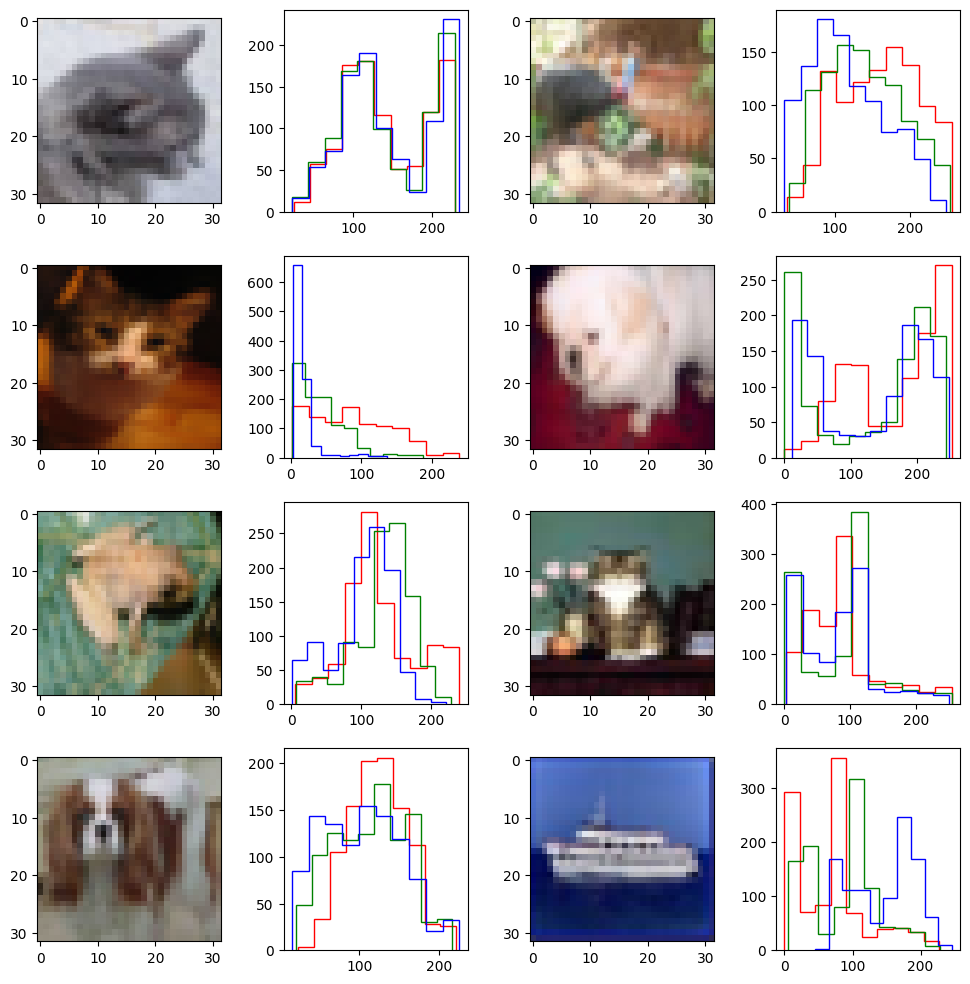

In [ ]:
plot_images_and_hist()

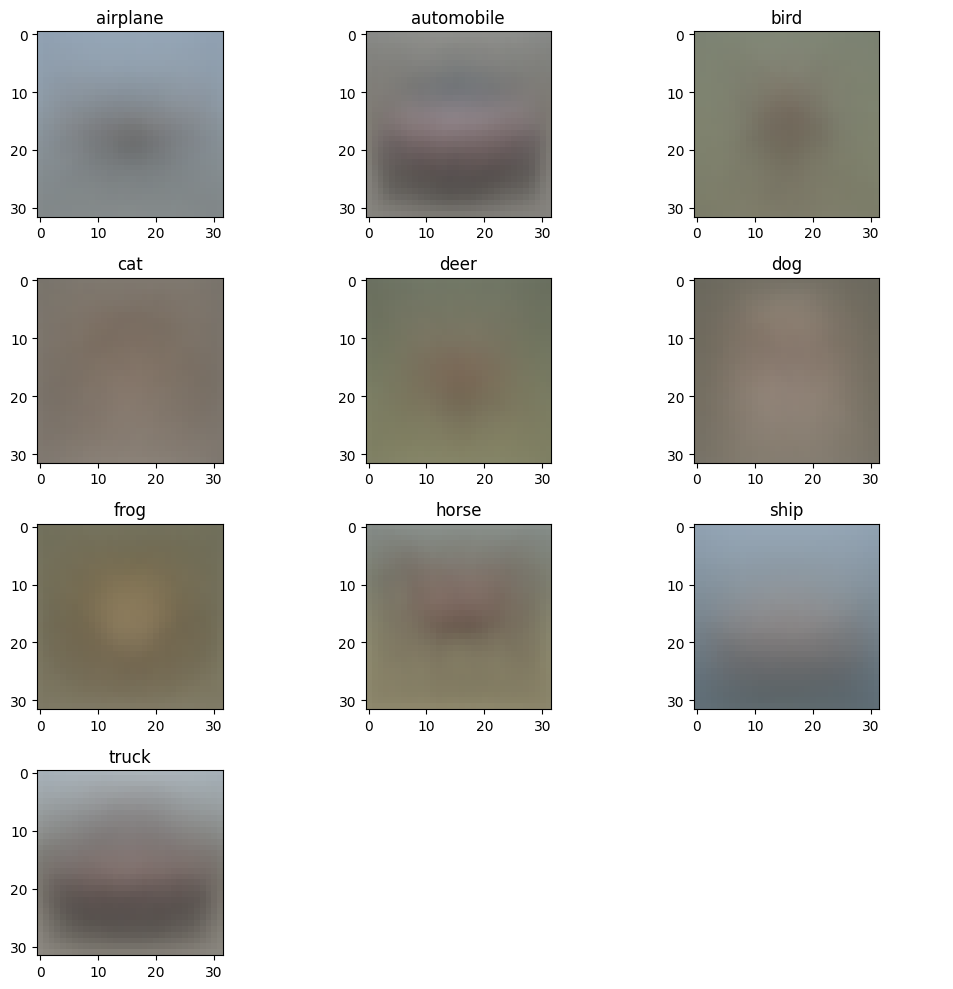

In [ ]:
# plot mean images
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
for i in range(10):
  training_class = training_X[training_y.ravel() == i]
  mean_image = training_class.mean(axis=0)
  mean_image_int = mean_image.astype(np.int64)
  row = i // 3
  col = i % 3
  axes[row, col].imshow(mean_image_int, interpolation='none');
  axes[row, col].set_title(label_dict[i])


axes[3, 1].axis("off")
axes[3, 2].axis("off")

plt.tight_layout()

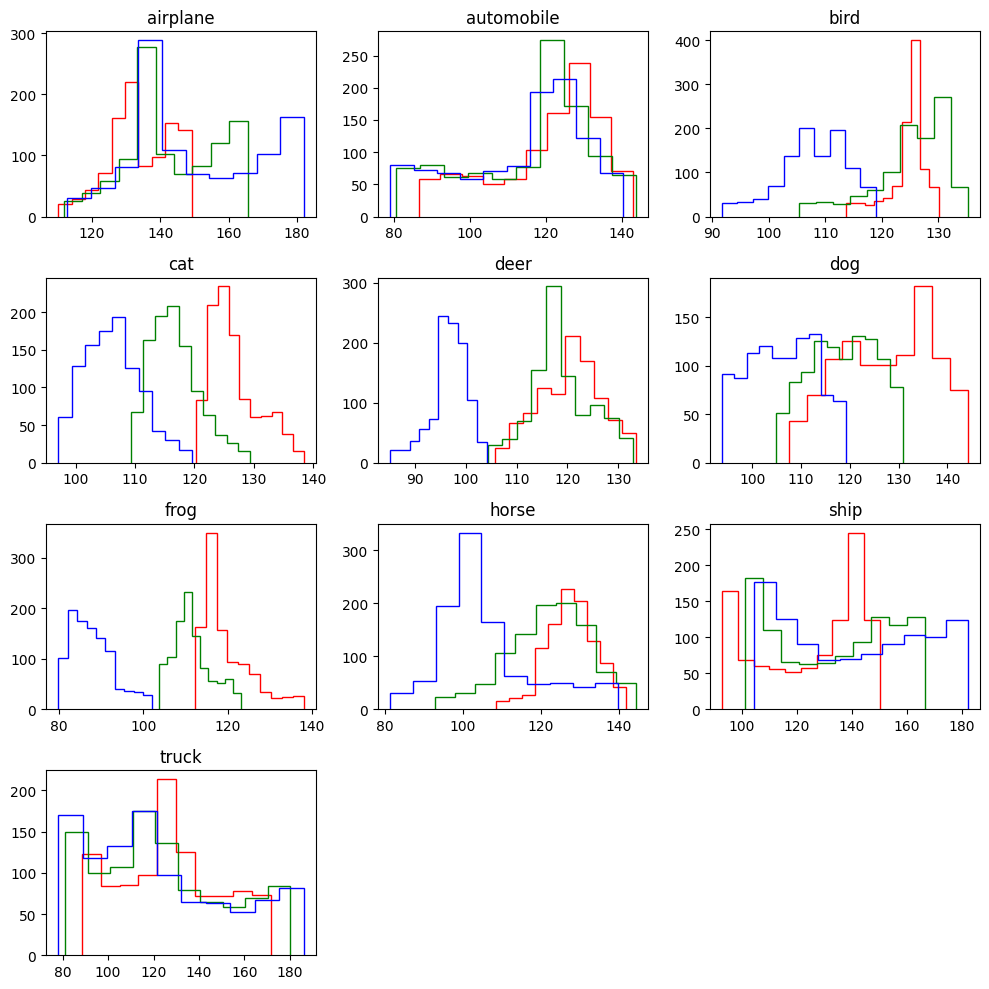

In [ ]:
# plot color histograms of mean images
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
for i in range(10):
  training_class = training_X[training_y.ravel() == i]
  mean_image = training_class.mean(axis=0)
  row = i // 3
  col = i % 3
  axes[row, col].hist(mean_image[:, :, 0].ravel(), histtype='step', color='red');
  axes[row, col].hist(mean_image[:, :, 1].ravel(), histtype='step', color='green');
  axes[row, col].hist(mean_image[:, :, 2].ravel(), histtype='step', color='blue');
  axes[row, col].set_title(label_dict[i])


axes[3, 1].axis("off")
axes[3, 2].axis("off")

plt.tight_layout()

In [ ]:
#Normal Neural Net

In [ ]:
import sklearn 
from sklearn.linear_model import LogisticRegression

In [ ]:
# preprocess
train_X = training_X / 255.
val_X = validation_X / 255.
test_X = testX / 255.

In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(), # this function converts image from (32, 32, 3) to 1D array 32^2 * 3 = 3072
     tf.keras.layers.Dense(128, activation=tf.nn.relu), # 128 is a choice # ReLU(x) = max(x, 0)
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ]) 

In [ ]:
model.compile(optimizer = "adam", # recall: gradient descent, stochastic gradient descent, RmsProp, ADAM
              loss = 'sparse_categorical_crossentropy', # loss: mean_square_error, mean_absolute_error, cross_entropy, binary_cross_entropy
              metrics=['acc'])

In [ ]:
history = model.fit(train_X, training_y, epochs=20,
                    validation_data=[val_X, validation_y])

Epoch 1/20
1407/1407 [==============================] - 11s 4ms/step - loss: 1.9142 - acc: 0.3142 - val_loss: 1.8015 - val_acc: 0.3534
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7660 - acc: 0.3706 - val_loss: 1.7504 - val_acc: 0.3722
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7163 - acc: 0.3851 - val_loss: 1.6978 - val_acc: 0.3958
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6872 - acc: 0.3942 - val_loss: 1.6902 - val_acc: 0.4040
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6659 - acc: 0.4059 - val_loss: 1.6854 - val_acc: 0.4000
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6589 - acc: 0.4056 - val_loss: 1.6751 - val_acc: 0.4096
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6357 - acc: 0.4162 - val_loss: 1.6318 - val_acc: 0.4248
Epoch 8/20
1407/1407 [==============================] - 6s 4m

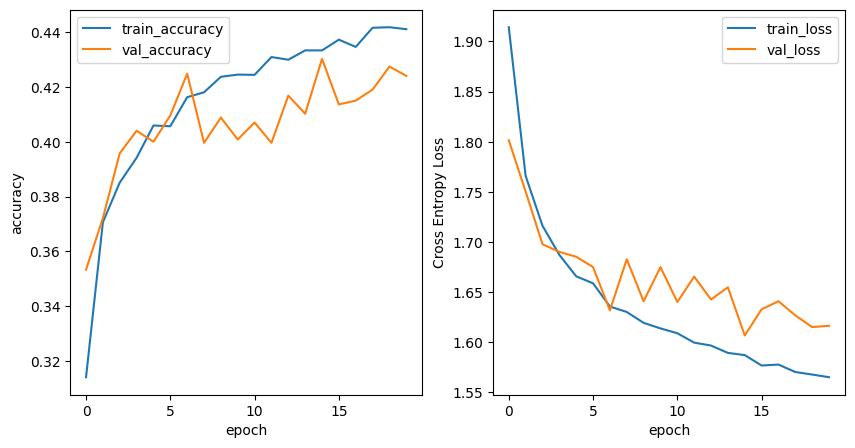

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['acc'], label="train_accuracy")
axes[0].plot(history.history['val_acc'], label="val_accuracy")
axes[0].set_xlabel("epoch")
axes[0].set_ylabel("accuracy")
axes[0].legend()

axes[1].plot(history.history['loss'], label="train_loss")
axes[1].plot(history.history['val_loss'], label="val_loss")
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("Cross Entropy Loss")
axes[1].legend()

CNN


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
input_shape = train_X.shape[1:] # (32, 32, 3)
class_num = 10


i = 2
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', input_shape=input_shape, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(class_num, activation='softmax'),
])
cnn_model.compile(optimizer="adam",
            loss='sparse_categorical_crossentropy', metrics=['acc'])
with tf.device(device_name=device_name):
  cnn_history = cnn_model.fit(train_X, training_y, epochs=30, batch_size=16,
                     validation_data=[val_X, validation_y])

Epoch 1/30
2813/2813 [==============================] - 35s 9ms/step - loss: 1.6909 - acc: 0.3952 - val_loss: 1.3478 - val_acc: 0.5040
Epoch 2/30
2813/2813 [==============================] - 24s 9ms/step - loss: 1.2591 - acc: 0.5544 - val_loss: 1.1808 - val_acc: 0.5828
Epoch 3/30
2813/2813 [==============================] - 24s 9ms/step - loss: 1.0908 - acc: 0.6206 - val_loss: 0.8669 - val_acc: 0.6976
Epoch 4/30
2813/2813 [==============================] - 24s 8ms/step - loss: 0.9921 - acc: 0.6548 - val_loss: 1.2402 - val_acc: 0.5882
Epoch 5/30
2813/2813 [==============================] - 24s 9ms/step - loss: 0.9211 - acc: 0.6811 - val_loss: 0.9659 - val_acc: 0.6648
Epoch 6/30
2813/2813 [==============================] - 23s 8ms/step - loss: 0.8690 - acc: 0.7003 - val_loss: 0.6891 - val_acc: 0.7580
Epoch 7/30
2813/2813 [==============================] - 24s 9ms/step - loss: 0.8265 - acc: 0.7175 - val_loss: 0.6767 - val_acc: 0.7648
Epoch 8/30
2813/2813 [==============================] -

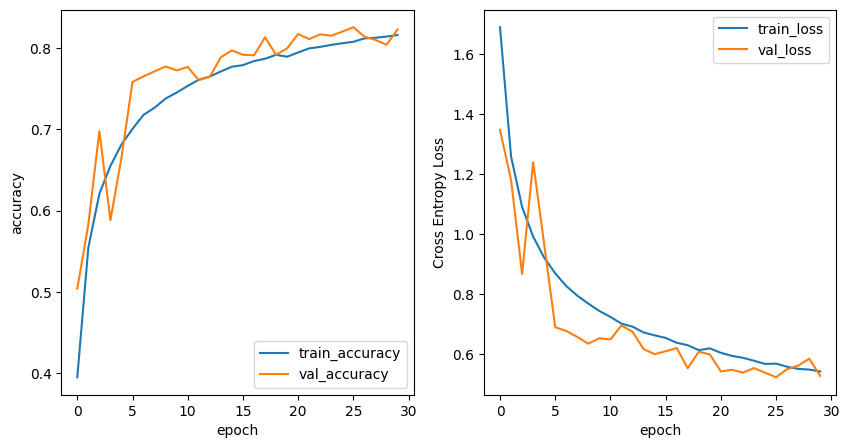

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(cnn_history.history['acc'], label="train_accuracy")
axes[0].plot(cnn_history.history['val_acc'], label="val_accuracy")
axes[0].set_xlabel("epoch")
axes[0].set_ylabel("accuracy")
axes[0].legend()

axes[1].plot(cnn_history.history['loss'], label="train_loss")
axes[1].plot(cnn_history.history['val_loss'], label="val_loss")
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("Cross Entropy Loss")
axes[1].legend()

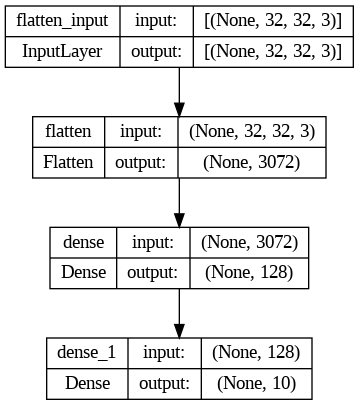

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)